Enter number of nodes:  4


Enter node names:


 A
 B
 C
 D

Enter number of directed edges:  5


Enter edges (from to):


 A B
 B C
 A D
 B D
 D C



Enter heuristic values (node heuristic):


Heuristic value for A:  4
Heuristic value for B:  3
Heuristic value for C:  2
Heuristic value for D:  0

Enter source node:  A
Enter destination node:  D


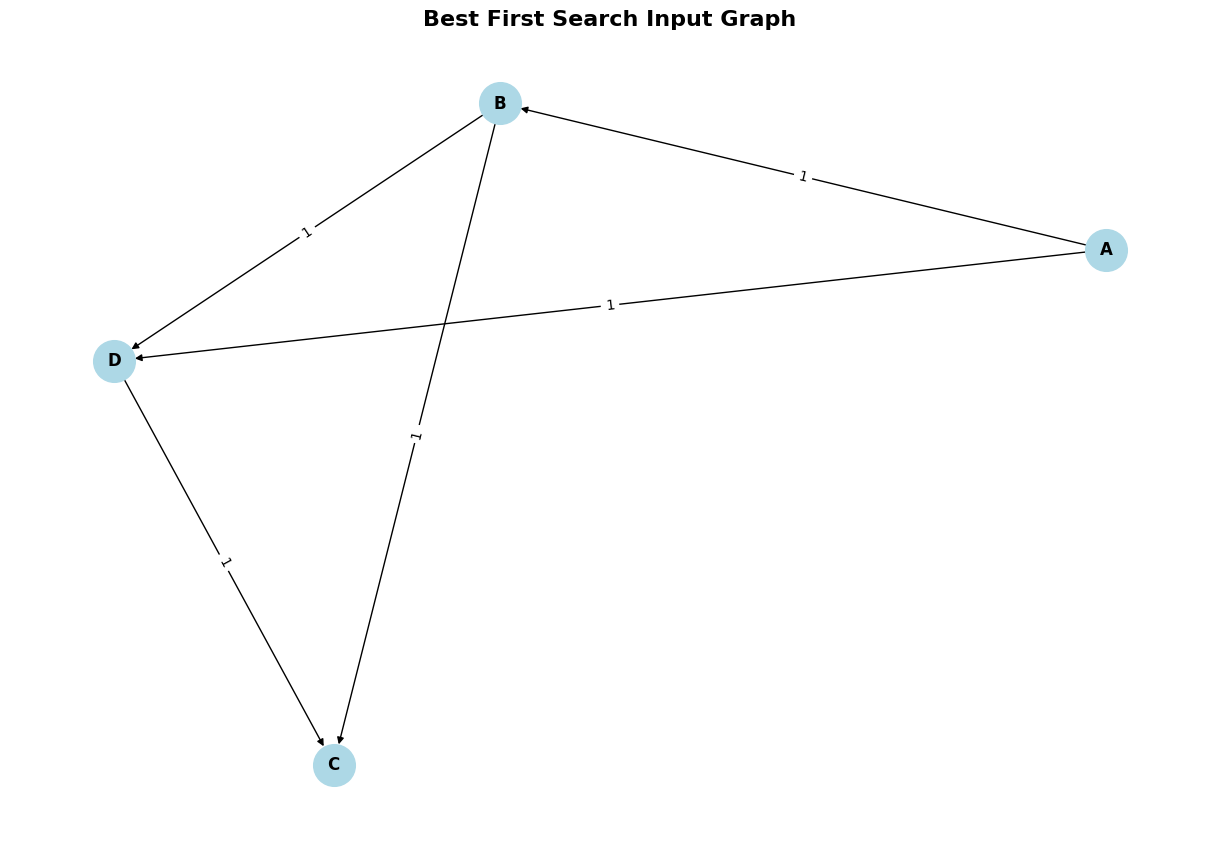


Total Cost (Best First Search): 1

Best First Search Path: ['A', 'D']


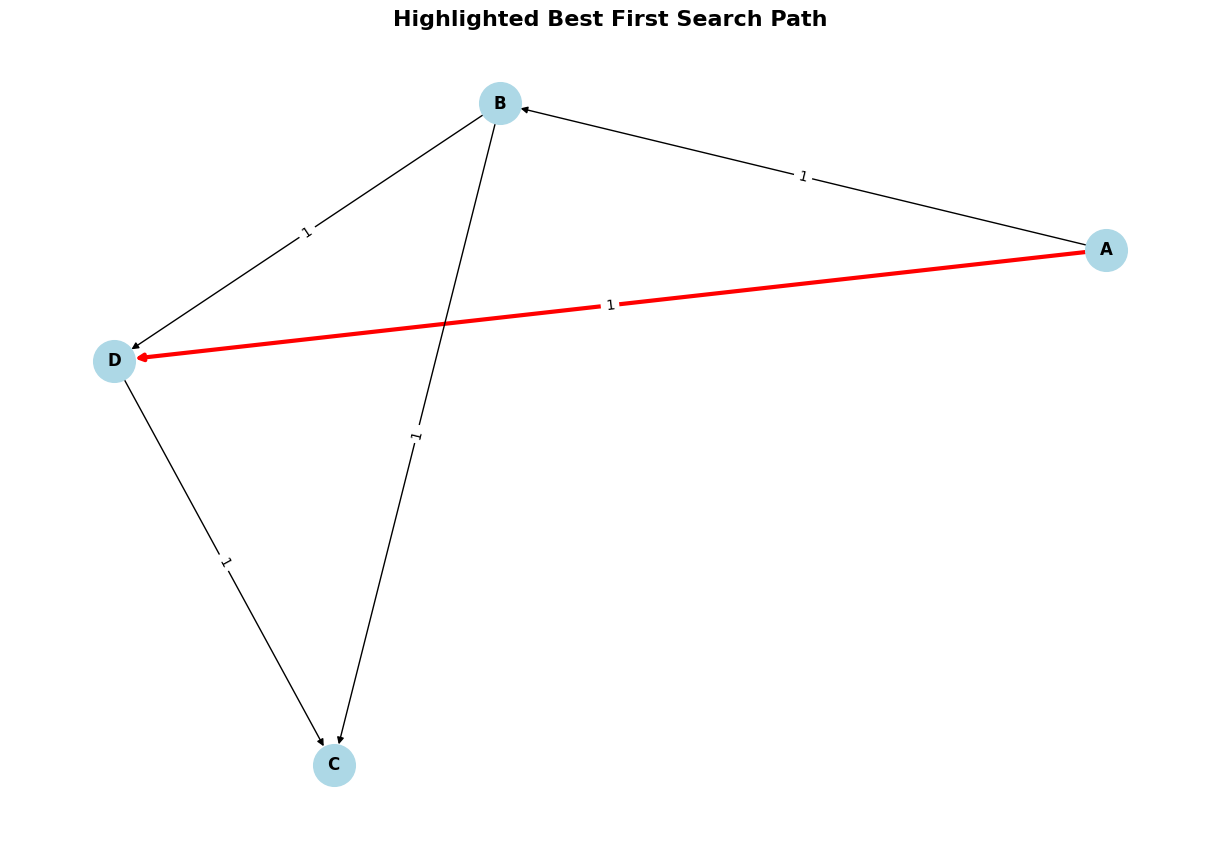

In [20]:
# 4. Implement Best First Search Algorithm. Read the directed unweighted graph and the heuristic values from user. D W user
import heapq
import networkx as nx
import matplotlib.pyplot as plt
class GraphVisualization:
    def __init__(self):
        self.graph = {}
        self.heuristics = {}
    def addEdge(self, a, b):
        if a not in self.graph:
            self.graph[a] = []
        self.graph[a].append((b, 1))  # Unweighted -> assume weight = 1
    def set_heuristics(self, heuristics):
        self.heuristics = heuristics
    def visualize(self, title, path_edges=None):
        G = nx.DiGraph()
        for node in self.graph:
            for neighbor, weight in self.graph[node]:
                G.add_edge(node, neighbor, weight=weight)
        pos = nx.kamada_kawai_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')
        if path_edges is None:
            path_edges = []
        plt.figure(figsize=(12, 8))
        edge_colors = ["red" if (u, v) in path_edges else "black" for u, v in G.edges()]
        edge_widths = [3 if (u, v) in path_edges else 1 for u, v in G.edges()]
        nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=900,
                edge_color=edge_colors, width=edge_widths, arrows=True, font_size=12, font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
        plt.title(title, fontsize=16, fontweight="bold")
        plt.show()
    def best_first_search(self, start, goal):
        visited = set()
        pq = [(self.heuristics[start], start)]
        parent = {start: None}
        total_cost = 0
        while pq:
            _, current = heapq.heappop(pq)
            if current not in visited:
                visited.add(current)
                if current == goal:
                    # Reconstruct path
                    path = []
                    path_edges = []
                    node = current
                    while node is not None:
                        path.insert(0, node)
                        prev = parent[node]
                        if prev is not None:
                            path_edges.insert(0, (prev, node))
                            total_cost += 1  # increment cost only for actual path edge
                        node = prev
                    print(f"\nTotal Cost (Best First Search): {total_cost}")
                    return path, path_edges
                for neighbor, _ in self.graph.get(current, []):
                    if neighbor not in visited:
                        heapq.heappush(pq, (self.heuristics[neighbor], neighbor))
                        if neighbor not in parent:  # only set parent if not already set
                            parent[neighbor] = current
        print("\nNo path found.")
        return [], []
# main fn
G = GraphVisualization()
num_nodes = int(input("Enter number of nodes: "))
nodes = []
print("Enter node names:")
for _ in range(num_nodes):
    node = input().strip()
    nodes.append(node)
num_edges = int(input("\nEnter number of directed edges: "))
print("Enter edges (from to):")
for _ in range(num_edges):
    a, b = input().split()
    G.addEdge(a, b)
heuristics = {}
print("\nEnter heuristic values (node heuristic):")
for node in nodes:
    h = int(input(f"Heuristic value for {node}: "))
    heuristics[node] = h
G.set_heuristics(heuristics)
source = input("\nEnter source node: ")
destination = input("Enter destination node: ")
G.visualize("Best First Search Input Graph")
path, path_edges = G.best_first_search(source, destination)
print("\nBest First Search Path:", path)
G.visualize("Highlighted Best First Search Path", path_edges)


# directed unweighted graph 10,25
# A,B A,C B,D B,E C,F C,G D,H E,H F,I G,I H,J I,J A,H B,G C,H D,I E,J F,B G,C H,F I,D J,A G,H E,F D,G
# A 9 B 7 C 8 D 6 E 5 F 4 G 6 H 3 I 2 J 0
# 4,5 - A B, B C, A D, B D, D C 
# A 4 B 3 C 2 D 0

In [19]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



Enter number of nodes:  5


Enter 5 nodes:


 A
 B
 C
 D
 E

Enter number of undirected edges:  6


Enter edges (from to weight):


 A B 2
 A C 4
 B D 7
 C D 1
 D E 3
 B E 5



Enter heuristic values (node heuristic):


Enter heuristic for node A:  7
Enter heuristic for node B:  6
Enter heuristic for node C:  5
Enter heuristic for node D:  3
Enter heuristic for node E:  0

Enter source node:  A
Enter destination node:  E


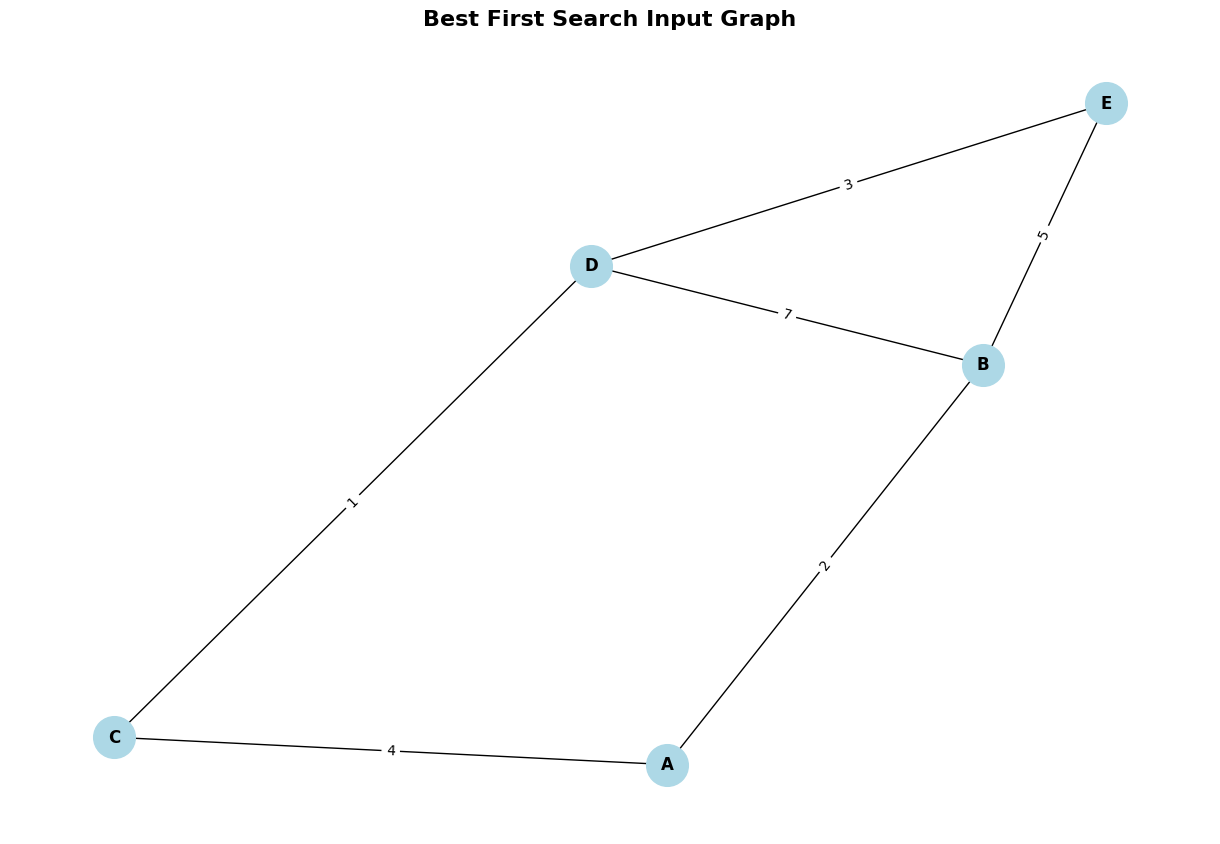


Total Cost (Best First Search): 8

Best First Search Path: ['A', 'C', 'D', 'E']


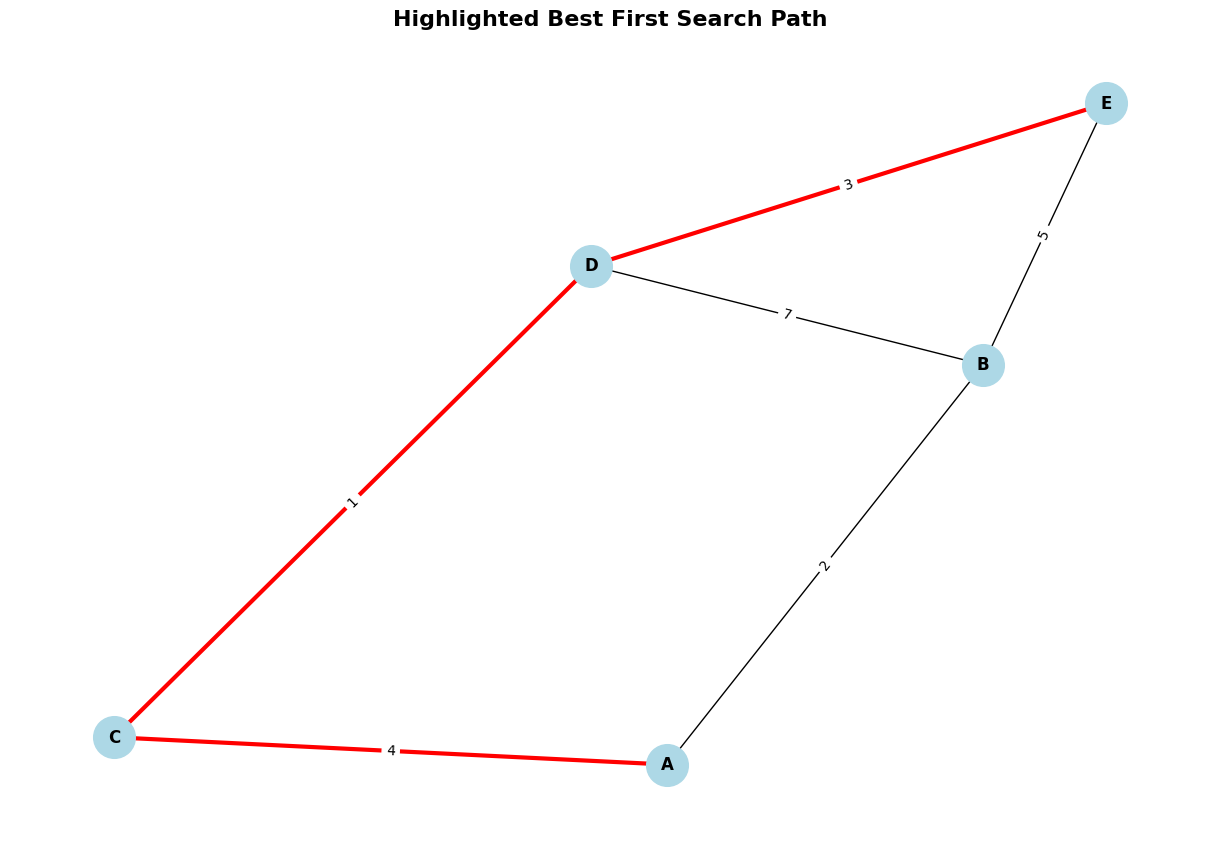

In [27]:
# 5. Implement Best First Search Algorithm. Read the undirected weighted graph and the heuristic values from user. U W user
import heapq
import networkx as nx
import matplotlib.pyplot as plt
class GraphVisualization:
    def __init__(self): 
        self.graph = {}
        self.heuristics = {}
    def addEdge(self, a, b, weight):  
        if a not in self.graph:
            self.graph[a] = []
        if b not in self.graph:
            self.graph[b] = []
        self.graph[a].append((b, weight))  
        self.graph[b].append((a, weight))  
    def set_heuristics(self, heuristics):
        self.heuristics = heuristics
    def visualize(self, title, path_edges=None):
        G = nx.Graph()  # changed DiGraph() -> Graph() for undirected
        for node in self.graph:
            for neighbor, weight in self.graph[node]:
                G.add_edge(node, neighbor, weight=weight)
        pos = nx.spring_layout(G, seed=42)
        labels = nx.get_edge_attributes(G, 'weight')
        if path_edges is None:
            path_edges = []
        plt.figure(figsize=(12, 8))
        edge_colors = ["red" if (u, v) in path_edges or (v, u) in path_edges else "black" for u, v in G.edges()]
        edge_widths = [3 if (u, v) in path_edges or (v, u) in path_edges else 1 for u, v in G.edges()]

        nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=900,
                edge_color=edge_colors, width=edge_widths, font_size=12, font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

        plt.title(title, fontsize=16, fontweight="bold")
        plt.show()

    def best_first_search(self, start, goal):
        visited = set()
        pq = [(self.heuristics[start], start)]
        parent = {start: None}
        total_cost = 0
        while pq:
            _, current = heapq.heappop(pq)
            if current not in visited:
                visited.add(current)
                if current == goal:
                    # Reconstruct path
                    path = []
                    path_edges = []
                    node = current
                    while node is not None:
                        path.insert(0, node)
                        prev = parent[node]
                        if prev is not None:
                            path_edges.insert(0, (prev, node))
                            # Look up the correct weight between prev and node
                            for neighbor, weight in self.graph[prev]:
                                if neighbor == node:
                                    total_cost += weight
                                    break
                        node = prev
                    print(f"\nTotal Cost (Best First Search): {total_cost}")
                    return path, path_edges

                for neighbor, _ in self.graph.get(current, []):
                    if neighbor not in visited:
                        heapq.heappush(pq, (self.heuristics[neighbor], neighbor))
                        if neighbor not in parent:
                            parent[neighbor] = current

        print("\nNo path found.")
        return [], []

# main function
G = GraphVisualization()
num_nodes = int(input("\nEnter number of nodes: "))
print(f"Enter {num_nodes} nodes:")
nodes = [input().strip() for _ in range(num_nodes)]  # Store node names

num_edges = int(input("\nEnter number of undirected edges: "))
print("Enter edges (from to weight):")
for _ in range(num_edges):
    a, b, w = input().split()
    G.addEdge(a, b, int(w))
heuristics = {}
print("\nEnter heuristic values (node heuristic):")
for node in nodes:
    h = int(input(f"Enter heuristic for node {node}: "))
    heuristics[node] = h
G.set_heuristics(heuristics)
source = input("\nEnter source node: ")
destination = input("Enter destination node: ")
G.visualize("Best First Search Input Graph")
path, path_edges = G.best_first_search(source, destination)
print("\nBest First Search Path:", path)
G.visualize("Highlighted Best First Search Path", path_edges)
# undirected weighted graph 10,25
# A,B,4 A,C,3 B,D,5 B,E,6 C,F,2 C,G,7 D,H,3 F,I,5 G,I,6 H,J,2 I,J,4 A,H,7 B,G,5 C,H,6 D,I,3 E,J,5 F,B,2 G,C,4 H,F,5 I,D,6 J,A,3 G,H,2 E,F,7 D,G,4
# A 9 B 7 C 8 D 6 E 5 F 4 G 6 H 3 I 2 J 0

#5,6 | A B 2 A C 4 B D 7 C D 1 D E 3 B E 5 | 7 6 5 3 0

Enter number of nodes:  5
Enter number of undirected edges:  6


Enter edges (from to):


 A B
 A C
 B D
 B E
 C D
 E D


Enter heuristic values (node heuristic):


 A 4
 B 3
 C 2
 D 1
 E 0

Enter source node:  A
Enter destination node:  E


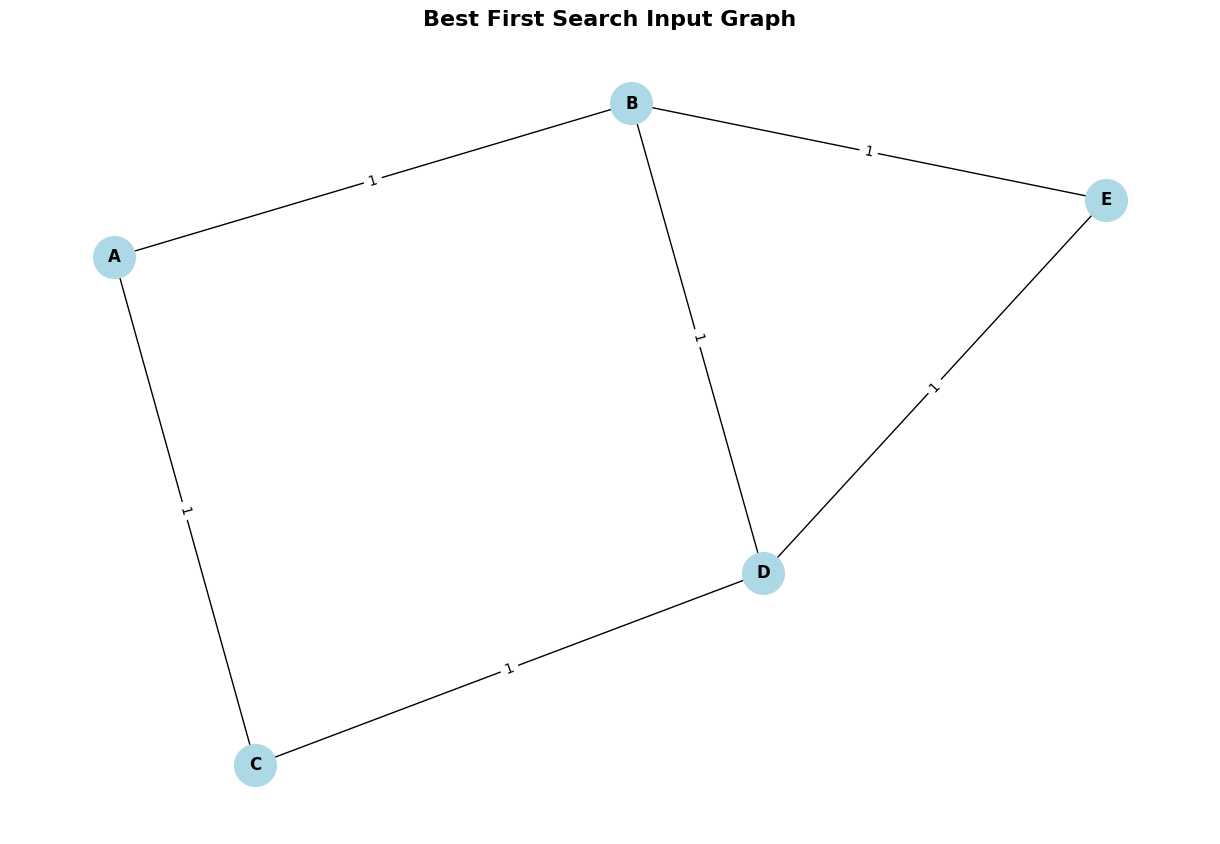


Total Cost (Best First Search): 3

Best First Search Path: ['A', 'C', 'D', 'E']


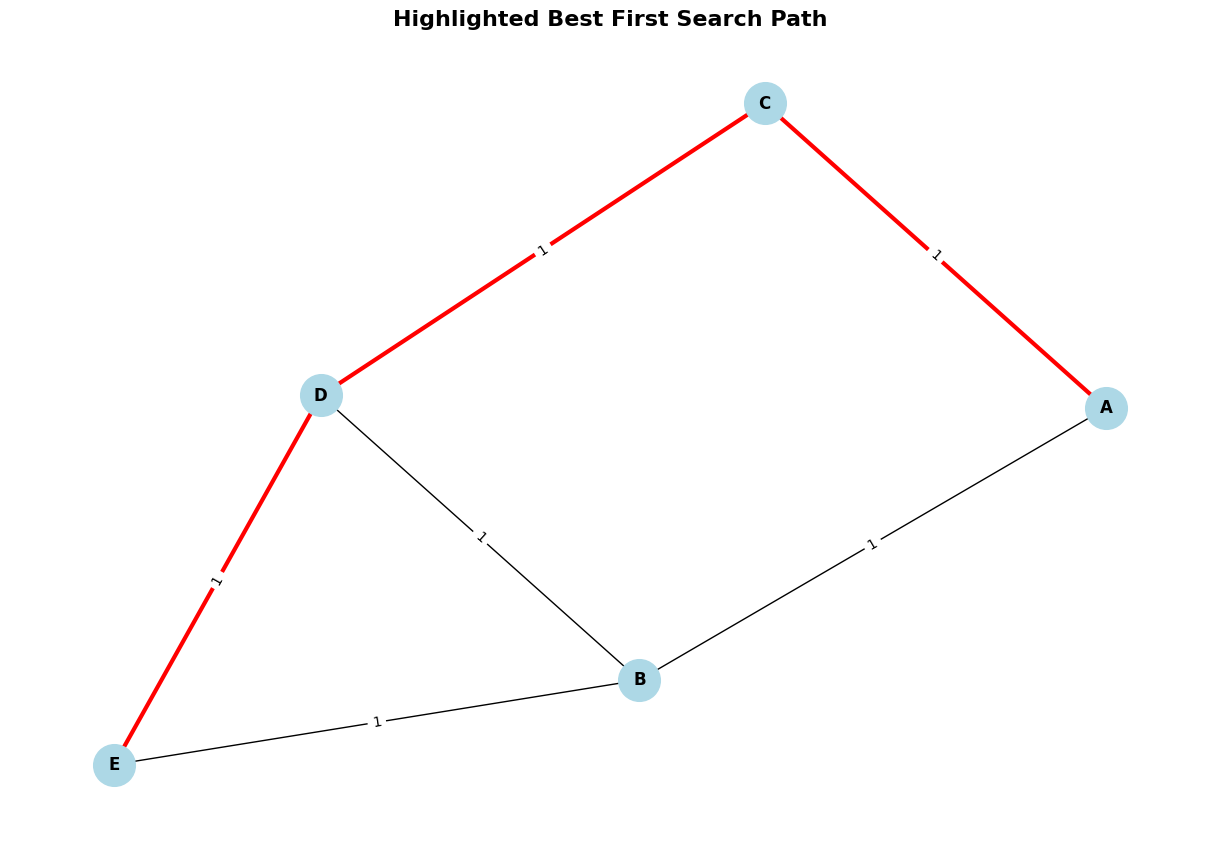

In [28]:
# 6. Implement Best First Search Algorithm. Read the undirected unweighted graph and the heuristic values from user. UU user
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualization:
    def __init__(self):
        self.graph = {}
        self.heuristics = {}

    def addEdge(self, a, b):
        # Default edge weight as 1 for unweighted graph
        if a not in self.graph:
            self.graph[a] = []
        if b not in self.graph:
            self.graph[b] = []
        self.graph[a].append((b, 1))  # Undirected graph: a -> b with weight 1
        self.graph[b].append((a, 1))  # Undirected graph: b -> a with weight 1

    def set_heuristics(self, heuristics):
        self.heuristics = heuristics

    def visualize(self, title, path_edges=None):
        G = nx.Graph()
        for node in self.graph:
            for neighbor, weight in self.graph[node]:
                G.add_edge(node, neighbor, weight=weight)
        
        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')
        
        if path_edges is None:
            path_edges = []
        
        plt.figure(figsize=(12, 8))
        edge_colors = ["red" if (u, v) in path_edges or (v, u) in path_edges else "black" for u, v in G.edges()]
        edge_widths = [3 if (u, v) in path_edges or (v, u) in path_edges else 1 for u, v in G.edges()]
        nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=900,
                edge_color=edge_colors, width=edge_widths, font_size=12, font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
        plt.title(title, fontsize=16, fontweight="bold")
        plt.show()

    def best_first_search(self, start, goal):
        visited = set()
        pq = [(self.heuristics[start], start)]  # Priority queue based on heuristic values
        parent = {start: None}
        total_cost = 0
        
        while pq:
            _, current = heapq.heappop(pq)
            if current not in visited:
                visited.add(current)
                if current == goal:
                    # Reconstruct path
                    path = []
                    path_edges = []
                    node = current
                    while node is not None:
                        path.insert(0, node)
                        prev = parent[node]
                        if prev is not None:
                            path_edges.insert(0, (prev, node))
                            total_cost += 1  # Increment cost only for actual path edge
                        node = prev
                    print(f"\nTotal Cost (Best First Search): {total_cost}")
                    return path, path_edges
                for neighbor, _ in self.graph.get(current, []):
                    if neighbor not in visited:
                        heapq.heappush(pq, (self.heuristics[neighbor], neighbor))
                        if neighbor not in parent:  # Only set parent if not already set
                            parent[neighbor] = current
        
        print("\nNo path found.")
        return [], []

# Main Function
G = GraphVisualization()
num_nodes = int(input("Enter number of nodes: "))
num_edges = int(input("Enter number of undirected edges: "))
print("Enter edges (from to):")
for _ in range(num_edges):
    a, b = input().split()
    G.addEdge(a, b)
heuristics = {}
print("Enter heuristic values (node heuristic):")
for _ in range(num_nodes):
    node, h = input().split()
    heuristics[node] = int(h)

G.set_heuristics(heuristics)
source = input("\nEnter source node: ")
destination = input("Enter destination node: ")
G.visualize("Best First Search Input Graph")
path, path_edges = G.best_first_search(source, destination)
print("\nBest First Search Path:", path)
G.visualize("Highlighted Best First Search Path", path_edges)

#5,6 | A B , A C , B D , B E , C D , E D | 4 3 2 1 0

Enter number of nodes:  5
Enter number of directed weighted edges:  6


Enter edges (from to weight):


 A B 2
 A C 4
 B D 1
 B E 5
 C D 3
 E D 1


Enter heuristic values (node heuristic):


 A 4
 B 3
 C 3
 D 1
 E 0

Enter source node:  A
Enter destination node:  E


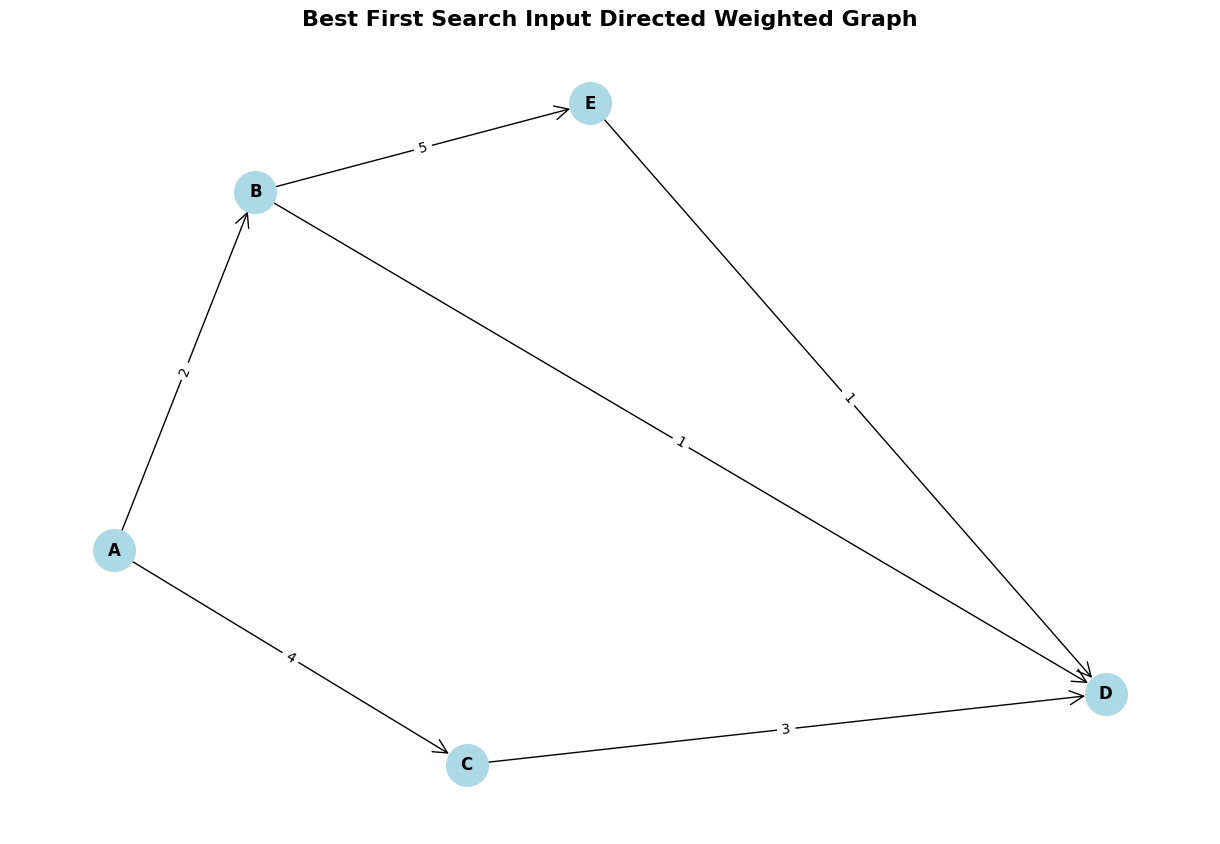


Total Cost (Best First Search): 7

Best First Search Path: ['A', 'B', 'E']


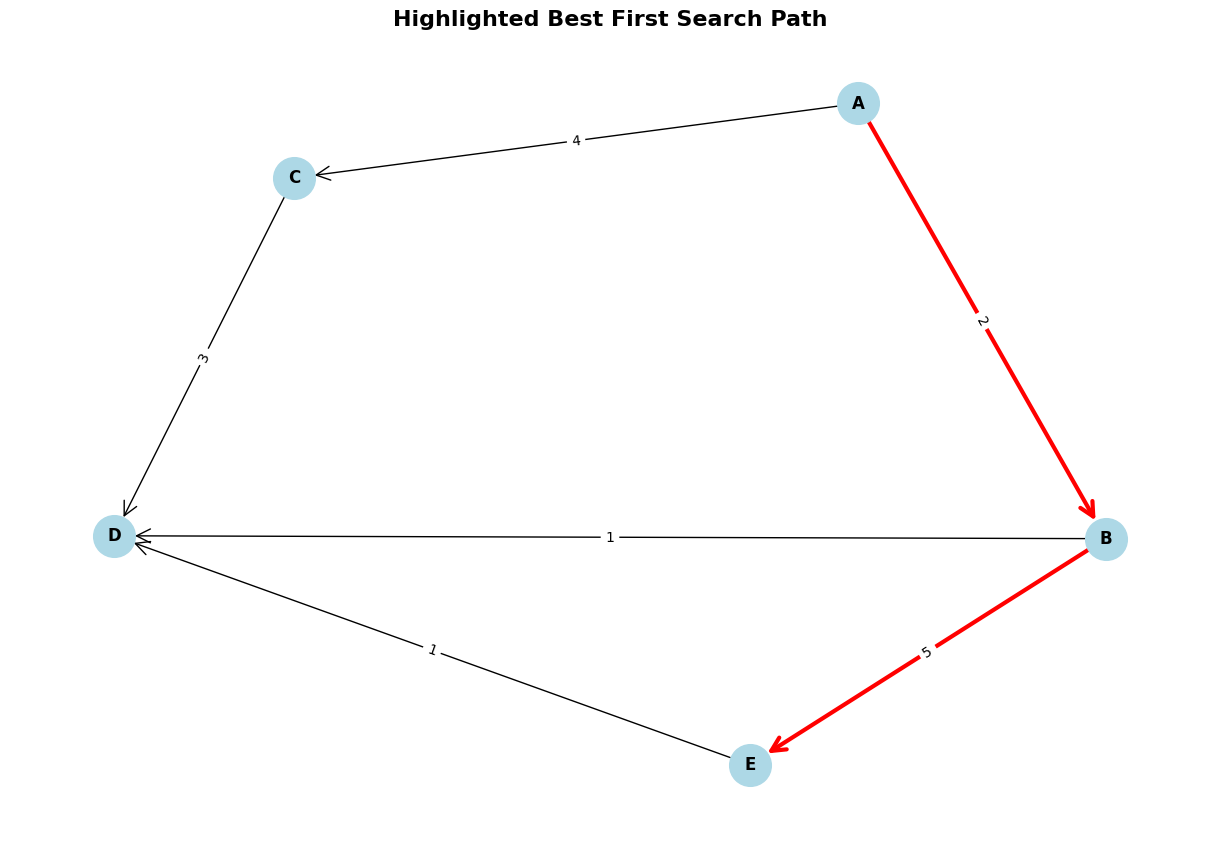

In [29]:
#7. Implement Best First Search Algorithm. Read the directed weighted graph
#and the heuristic values from user. D W user
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualization:
    def __init__(self):
        self.graph = {}
        self.heuristics = {}

    def addEdge(self, a, b, weight):
        if a not in self.graph:
            self.graph[a] = []
        # For directed graph, add only a -> b
        self.graph[a].append((b, weight))

    def set_heuristics(self, heuristics):
        self.heuristics = heuristics

    def visualize(self, title, path_edges=None):
        G = nx.DiGraph()  # Directed Graph
        for node in self.graph:
            for neighbor, weight in self.graph[node]:
                G.add_edge(node, neighbor, weight=weight)
        
        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')
        
        if path_edges is None:
            path_edges = []
        
        plt.figure(figsize=(12, 8))
        edge_colors = ["red" if (u, v) in path_edges else "black" for u, v in G.edges()]
        edge_widths = [3 if (u, v) in path_edges else 1 for u, v in G.edges()]
        nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=900,
                edge_color=edge_colors, width=edge_widths, font_size=12, font_weight="bold",
                arrowsize=25, arrowstyle='->')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
        plt.title(title, fontsize=16, fontweight="bold")
        plt.show()

    def best_first_search(self, start, goal):
        visited = set()
        pq = [(self.heuristics[start], start)]  # Priority queue based on heuristic values
        parent = {start: None}
        total_cost = 0
        
        while pq:
            _, current = heapq.heappop(pq)
            if current not in visited:
                visited.add(current)
                if current == goal:
                    # Reconstruct path
                    path = []
                    path_edges = []
                    node = current
                    while node is not None:
                        path.insert(0, node)
                        prev = parent[node]
                        if prev is not None:
                            # Find the correct weight
                            for neigh, wt in self.graph[prev]:
                                if neigh == node:
                                    path_edges.insert(0, (prev, node))
                                    total_cost += wt
                                    break
                        node = prev
                    print(f"\nTotal Cost (Best First Search): {total_cost}")
                    return path, path_edges
                for neighbor, _ in self.graph.get(current, []):
                    if neighbor not in visited:
                        heapq.heappush(pq, (self.heuristics[neighbor], neighbor))
                        if neighbor not in parent:
                            parent[neighbor] = current
        
        print("\nNo path found.")
        return [], []

# Main Function
G = GraphVisualization()
num_nodes = int(input("Enter number of nodes: "))
num_edges = int(input("Enter number of directed weighted edges: "))
print("Enter edges (from to weight):")
for _ in range(num_edges):
    a, b, weight = input().split()
    G.addEdge(a, b, int(weight))
heuristics = {}
print("Enter heuristic values (node heuristic):")
for _ in range(num_nodes):
    node, h = input().split()
    heuristics[node] = int(h)

G.set_heuristics(heuristics)
source = input("\nEnter source node: ")
destination = input("Enter destination node: ")
G.visualize("Best First Search Input Directed Weighted Graph")
path, path_edges = G.best_first_search(source, destination)
print("\nBest First Search Path:", path)
G.visualize("Highlighted Best First Search Path", path_edges)

#5,6 | A B 2 , A C 4 , B D 1 , B E 5 , C D 3 , E D 1 | 4 3 2 1 0